In [23]:
import pandas as pd

In [24]:
import numpy as np

In [25]:
#Leemos el csv
datos = pd.read_csv('C:\master\dataset.csv')

In [26]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid
0,1,2010-10-08,Night,0,2.08,41.41
1,1,2011-02-16,Morning,0,2.08,41.41
2,1,2014-05-31,Night,0,2.08,41.41
3,1,2011-04-03,Afternoon,0,2.08,41.41
4,1,2013-02-20,Morning,0,2.08,41.41


In [27]:
datos.shape

(824587, 6)

In [28]:
datos.dtypes

GridID              int64
date               object
Shift              object
Accident            int64
Longitude.grid    float64
Latitude.grid     float64
dtype: object

In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824587 entries, 0 to 824586
Data columns (total 6 columns):
GridID            824587 non-null int64
date              824587 non-null object
Shift             824587 non-null object
Accident          824587 non-null int64
Longitude.grid    824587 non-null float64
Latitude.grid     824587 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 37.7+ MB


In [30]:
datos.isnull().values.any()

False

In [31]:
datos.duplicated().sum()

326

Si hay duplicados entendemos que son accidentes que se pueden producir por "efecto miron" u otras causas.

In [32]:
datos['date'] = pd.to_datetime(datos['date'])

In [33]:
datos["Accident"].value_counts()

0    788070
1     36517
Name: Accident, dtype: int64

In [34]:
datos["Shift"].value_counts()

Afternoon    279847
Morning      277391
Night        267349
Name: Shift, dtype: int64

In [35]:
datos["GridID"].value_counts()

798     747
795     737
872     737
906     721
656     715
729     697
343     690
868     686
834     686
870     683
797     682
1054    678
726     676
800     676
799     676
692     675
763     673
909     673
723     672
971     670
649     669
688     669
579     667
946     666
947     664
619     663
869     663
1019    663
580     663
502     662
       ... 
29      513
1401    512
1195    512
57      512
5       511
519     510
312     509
712     508
244     508
122     508
819     507
313     507
1379    507
194     507
678     505
48      503
353     502
84      502
23      502
1008    500
136     498
137     498
675     496
845     496
117     495
1187    493
1310    492
1274    488
68      482
891     478
Name: GridID, Length: 1445, dtype: int64

In [36]:
dummy = pd.get_dummies(datos["Shift"])
dummy.head()

,Afternoon,Morning,Night
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0


In [37]:
datosD = pd.concat([datos, dummy], axis=1)
datosD.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night
0,1,2010-10-08,Night,0,2.08,41.41,0,0,1
1,1,2011-02-16,Morning,0,2.08,41.41,0,1,0
2,1,2014-05-31,Night,0,2.08,41.41,0,0,1
3,1,2011-04-03,Afternoon,0,2.08,41.41,1,0,0
4,1,2013-02-20,Morning,0,2.08,41.41,0,1,0


In [38]:
datosD = datosD.drop("Shift", 1)

In [39]:
datosD.head()

,GridID,date,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night
0,1,2010-10-08,0,2.08,41.41,0,0,1
1,1,2011-02-16,0,2.08,41.41,0,1,0
2,1,2014-05-31,0,2.08,41.41,0,0,1
3,1,2011-04-03,0,2.08,41.41,1,0,0
4,1,2013-02-20,0,2.08,41.41,0,1,0


Revisamos si hay valores NaN, hemos revisado los tipos, consumo en memoria, balanceo de Shift y numero de registros
con accidentes

Vamos a trabajar con la variable fecha, intentaremos obtener todos los datos derivados de ella

In [40]:
from datetime import datetime, date, time, timedelta
import calendar

In [41]:
Week_Day = []
for fecha in datosD['date']:
    dia_semana = datetime.weekday(fecha)+1
    Week_Day.append(dia_semana)
    
datosD['Week.Day'] = Week_Day
del Week_Day

In [42]:
datosD.head()

,GridID,date,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night,Week.Day
0,1,2010-10-08,0,2.08,41.41,0,0,1,5
1,1,2011-02-16,0,2.08,41.41,0,1,0,3
2,1,2014-05-31,0,2.08,41.41,0,0,1,6
3,1,2011-04-03,0,2.08,41.41,1,0,0,7
4,1,2013-02-20,0,2.08,41.41,0,1,0,3


Definimos un vector de festivos para poder identificar esto tipo de dias

In [43]:
festivos = ('1-1','6-1','19-4','22-4','1-05','10-6','24-6','15-8','11-9','24-9','12-10','1-11','6-12','8-12','25-12','26-12')

In [44]:
festive = []
for fecha in datosD['date']:
    pasat = False
    for festivo in festivos:
        aux = festivo.split("-")
        aux2 = datetime.strftime(fecha, '%Y-%m-%d').split("-")
        if ( (aux2[1] == aux[1]) and (aux2[2] == aux[0]) and (pasat == False) ):
            festive.append(1)
            pasat = True
    if (pasat == False):
        festive.append(0)

datosD['Festive'] = festive
del festive
del festivos

In [45]:
datosD.head()

,GridID,date,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night,Week.Day,Festive
0,1,2010-10-08,0,2.08,41.41,0,0,1,5,0
1,1,2011-02-16,0,2.08,41.41,0,1,0,3,0
2,1,2014-05-31,0,2.08,41.41,0,0,1,6,0
3,1,2011-04-03,0,2.08,41.41,1,0,0,7,0
4,1,2013-02-20,0,2.08,41.41,0,1,0,3,0


In [46]:
datosD['Festive'].value_counts()

0    817881
1      6706
Name: Festive, dtype: int64

Obtenemos Festivos muy desbalanceado, intentaremos mejorar añadiendo los domingos, el dia marcado como 7

In [47]:
datosD.loc[datosD['Week.Day'] > 6, 'Festive'] = 1 

Hemos realizado una busqueda del campo 'Week.Day' condicionado a si es mayor de 6 (Sábado), lo marque como festivo (Domingo)

In [48]:
datosD.head()

,GridID,date,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night,Week.Day,Festive
0,1,2010-10-08,0,2.08,41.41,0,0,1,5,0
1,1,2011-02-16,0,2.08,41.41,0,1,0,3,0
2,1,2014-05-31,0,2.08,41.41,0,0,1,6,0
3,1,2011-04-03,0,2.08,41.41,1,0,0,7,1
4,1,2013-02-20,0,2.08,41.41,0,1,0,3,0


In [49]:
datosD['Festive'].value_counts()

0    703431
1    121156
Name: Festive, dtype: int64

Hemos mejorado algo, intentaremos mejorar añadiendo fines de semana

In [50]:
weekend = []
for dia in datosD['Week.Day']:
    if dia > 5:
        weekend.append(1)
    else:
        weekend.append(0)
    
datosD['Weekend'] = weekend
del weekend

In [51]:
datosD['Weekend'].value_counts()

0    591925
1    232662
Name: Weekend, dtype: int64

In [52]:
datosD.head()

,GridID,date,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night,Week.Day,Festive,Weekend
0,1,2010-10-08,0,2.08,41.41,0,0,1,5,0,0
1,1,2011-02-16,0,2.08,41.41,0,1,0,3,0,0
2,1,2014-05-31,0,2.08,41.41,0,0,1,6,0,1
3,1,2011-04-03,0,2.08,41.41,1,0,0,7,1,1
4,1,2013-02-20,0,2.08,41.41,0,1,0,3,0,0


In [53]:
datosD

,GridID,date,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night,Week.Day,Festive,Weekend
0,1,2010-10-08,0,2.0800,41.4100,0,0,1,5,0,0
1,1,2011-02-16,0,2.0800,41.4100,0,1,0,3,0,0
2,1,2014-05-31,0,2.0800,41.4100,0,0,1,6,0,1
3,1,2011-04-03,0,2.0800,41.4100,1,0,0,7,1,1
4,1,2013-02-20,0,2.0800,41.4100,0,1,0,3,0,0
5,1,2013-05-05,0,2.0800,41.4100,0,1,0,7,1,1
6,1,2012-10-08,0,2.0800,41.4100,0,0,1,1,0,0
7,1,2012-07-16,0,2.0800,41.4100,1,0,0,1,0,0
8,1,2011-11-27,0,2.0800,41.4100,0,0,1,7,1,1
9,1,2011-01-03,0,2.0800,41.4100,1,0,0,1,0,0


Realizamos una visual de los datos y vemos que concuerda con lo que hemos realizado hasta ahora

Vamos a realizar alguna inspección visual por si podemos obtener algo de información

In [54]:
import seaborn as sns

In [55]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

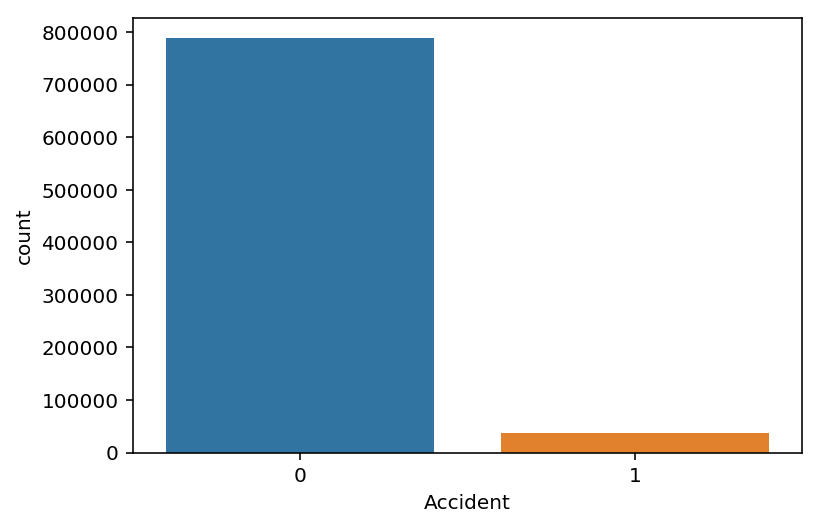

In [56]:
sns.countplot(x="Accident", data=datosD)

In [57]:
from matplotlib import pyplot as plt

Vemos que hay muy pocos accidentes en los dias festivos. Casi insignificante.

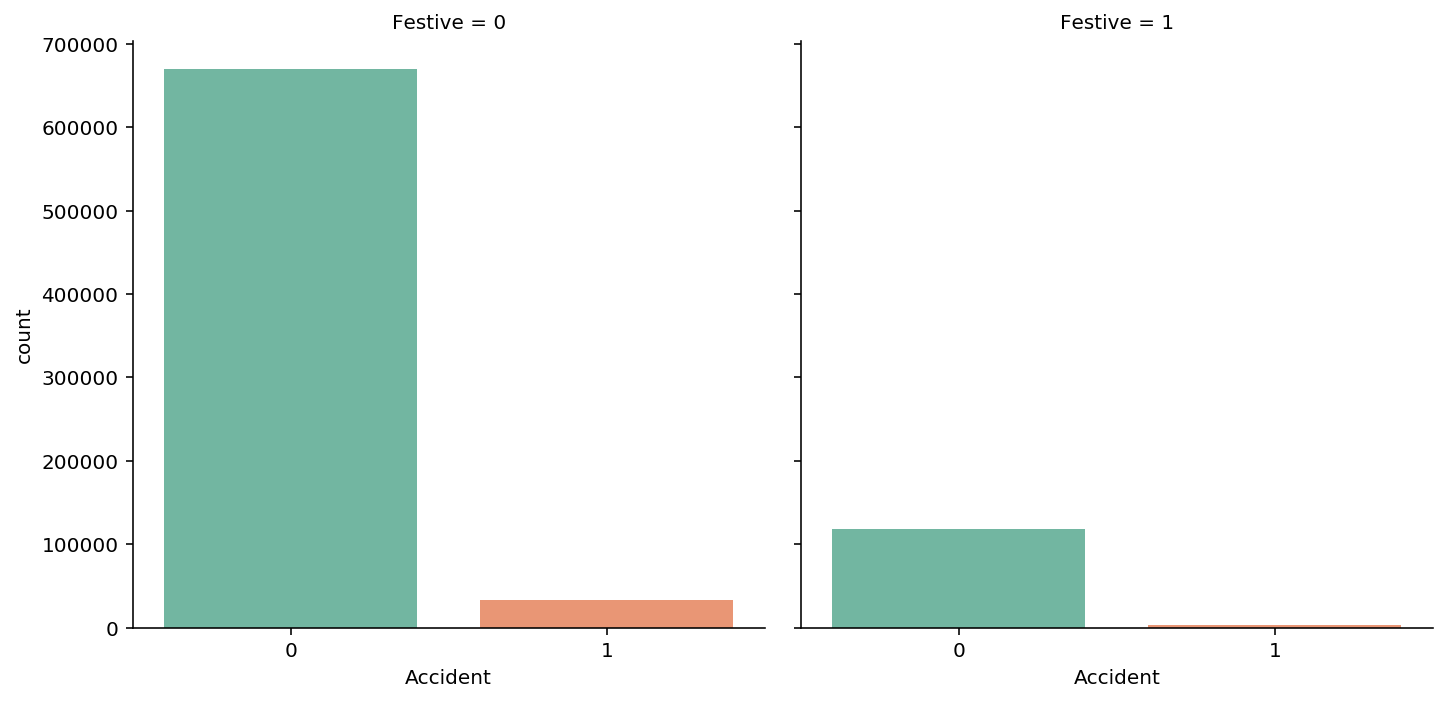

In [58]:
sns.catplot(x="Accident", col="Festive",data=datosD, palette="Set2", kind="count")

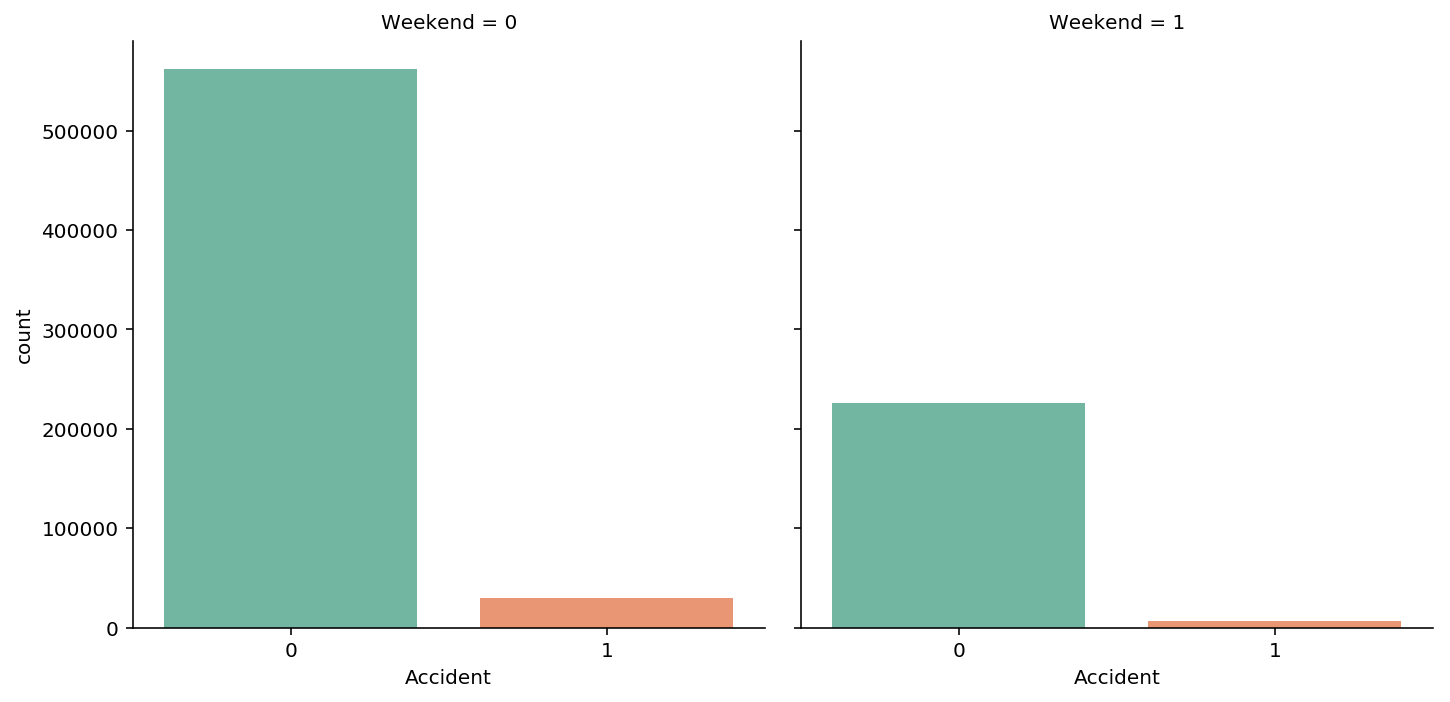

In [59]:
sns.catplot(x="Accident", col="Weekend",data=datosD, palette="Set2", kind="count")

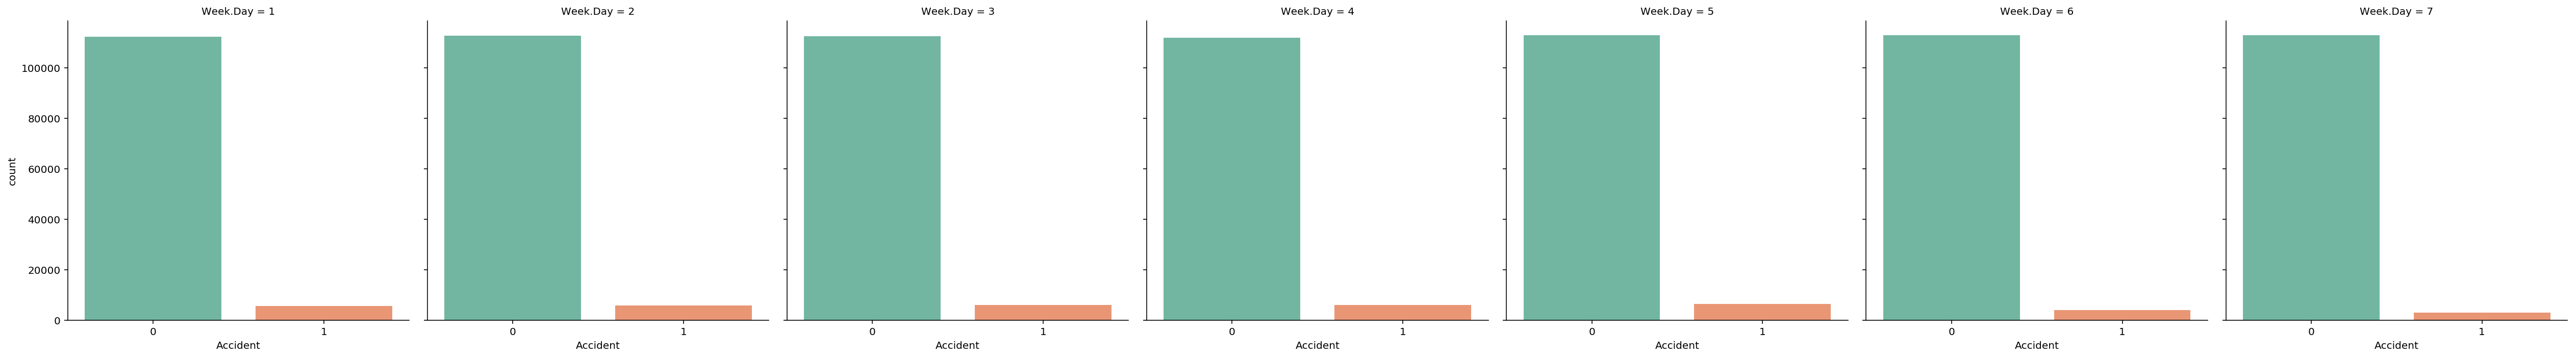

In [60]:
sns.catplot(x="Accident", col="Week.Day",data=datosD, palette="Set2", kind="count")

Los dias con mas accidentes son los laborables, podemos hacer una agrupación de estos, laborable o no. Intentamos realizar una clasificación como tenemos los valores ahora.

# Árbol decisiones

Vamos a realizar una primera clasificación del modelo realizando una clasificación por árboles. 

In [61]:
X = datosD.drop("Accident",1)
X = X.drop("date",1)

In [62]:
y = datosD["Accident"]

In [63]:
print(X.shape)
print(y.shape)

(824587, 9)
(824587,)


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=1)

In [65]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(577210, 9)
(247377, 9)
(577210,)
(247377,)


In [66]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [67]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [68]:
y_train_pred = DTC.predict_proba(X_train)

In [69]:
from sklearn.metrics import roc_auc_score

In [70]:
print(roc_auc_score(y_train, y_train_pred[:, 1]), "Árbol de decisión - Datos de entrenamiento")

0.8842975712086046 Árbol de decisión - Datos de entrenamiento


In [71]:
y_test_pred = DTC.predict_proba(X_test)

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline
rfp, rvp, umbrales = metrics.roc_curve(y_test, y_test_pred_proba[:,1])
plt.plot(rfp, rvp)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Espesificidad\n1.0 0.8 0.6 0.4
0.2 0.0', fontsize=10)
plt.xlabel('1 - Espesificidad = Ratio de falsos positivos')
plt.ylabel('Sensibilidad = Ratio verdaderos positivos')
plt.grid(True)

In [72]:
print(roc_auc_score(y_test, y_test_pred[:, 1]), "Árbol de decisión - Datos de test")

0.7319854288509109 Árbol de decisión - Datos de test
